In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pickle
from modules.utils import to_latex_table

In [2]:
figscale = 0.7
figscale_alt = 0.5
FIGSIZE_NORMAL = (14*figscale, 8*figscale)
FIGSIZE = (14*figscale_alt, 8*figscale_alt)

In [3]:
df = pd.read_pickle('..//data//extended_model_simulations.pkl')

In [4]:
df['does_work'] = df['action'].apply(lambda x: x > 0)

In [5]:

kids30 = set(df.loc[(df['K_minus'] == 0) & \
            (df['K'] == 1) & (df['Q'] == 30) & (df['K_plus_20'] == 1)]['episode'])
kids25 = set(df.loc[(df['K_minus'] == 0) & \
            (df['K'] == 1) & (df['Q'] == 25) & (df['K_plus_20'] == 1)]['episode'])
kids35 = set(df.loc[(df['K_minus'] == 0) & \
            (df['K'] == 1) & (df['Q'] == 35) & (df['K_plus_20'] == 1)]['episode'])
kids0 = set(df.loc[(df['Q'] == 35) & (df['K_plus'] == 0) & (df['K_plus_20'] == 0)]['episode'])

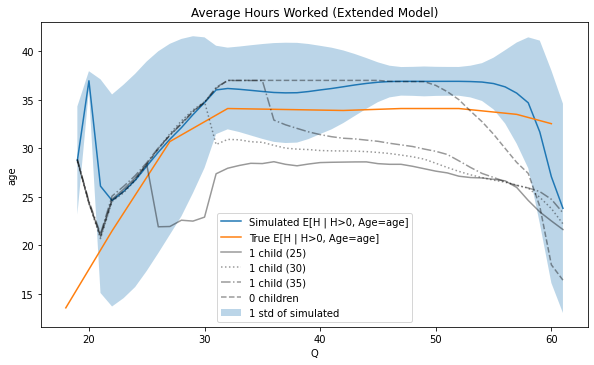

In [6]:
with open("..//data//women_hours_empirical", "rb") as f:
    women_hours_data = pickle.load(f)    

f, ax = plt.subplots(1,1, figsize=FIGSIZE_NORMAL)
ax.set_title("Average Hours Worked (Extended Model)")

standard = df.loc[df['action'] > 0].groupby('Q').mean()['action']
std = df.loc[df['action'] > 0].groupby('Q')['action'].std()

standard.plot(label='Simulated E[H | H>0, Age=age]')
plt.fill_between(standard.index, standard -std, standard + std, alpha=0.3, label='1 std of simulated')
plt.plot(range(18,61), women_hours_data[18:61], label='True E[H | H>0, Age=age]')

y25 = df.loc[df['episode'].isin(kids25)].groupby('Q')['action'].mean()
y25.plot(label='1 child (25)', color='black', alpha=0.4)
y30 = df.loc[df['episode'].isin(kids30)].groupby('Q')['action'].mean()
y30.plot(label='1 child (30)', color='black', alpha=0.4, ls='dotted')
y35 = df.loc[df['episode'].isin(kids35)].groupby('Q')['action'].mean()
y35.plot(label='1 child (35)', color='black', alpha=0.4, ls='-.')

y0 = df.loc[df['episode'].isin(kids0)].groupby('Q')['action'].mean()
y0.plot(label='0 children', color='black', alpha=0.4, ls='--')

ax.set_ylabel('hours worked')
ax.set_ylabel('age')

ax.legend()

f.savefig('..//figures//extended_model_average_hours')

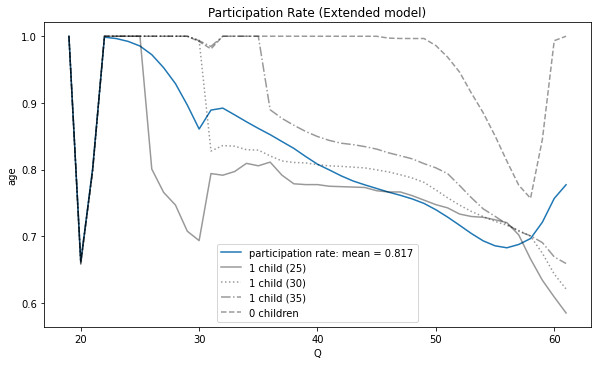

In [7]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE_NORMAL)
ax.set_title("Participation Rate (Extended model)")

    
_m = np.mean(df.groupby('Q').mean()['does_work'])

df.groupby('Q').mean()['does_work'].plot(label=f'participation rate: mean = {_m:.3f}')


y25 = df.loc[df['episode'].isin(kids25)].groupby('Q')['does_work'].mean()
y25.plot(label='1 child (25)', color='black', alpha=0.4)
y30 = df.loc[df['episode'].isin(kids30)].groupby('Q')['does_work'].mean()
y30.plot(label='1 child (30)', color='black', alpha=0.4, ls='dotted')
y35 = df.loc[df['episode'].isin(kids35)].groupby('Q')['does_work'].mean()
y35.plot(label='1 child (35)', color='black', alpha=0.4, ls='-.')

y0 = df.loc[df['episode'].isin(kids0)].groupby('Q')['does_work'].mean()
y0.plot(label='0 children', color='black', alpha=0.4, ls='--')

ax.set_ylabel('participation rate')
ax.set_ylabel('age')

ax.legend()

f.savefig('..//figures//extended_model_participation_rates')

0.7905583147551102 0.7631789960924238


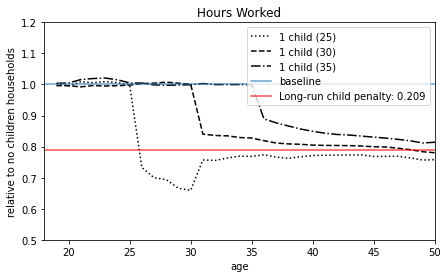

In [8]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Hours Worked")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['action'].mean()

y25 = (df.loc[df['episode'].isin(kids25)].groupby('Q')['action'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30)].groupby('Q')['action'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35)].groupby('Q')['action'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')


ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_hours_worked')


0.8514586226724234 0.8266733308905415


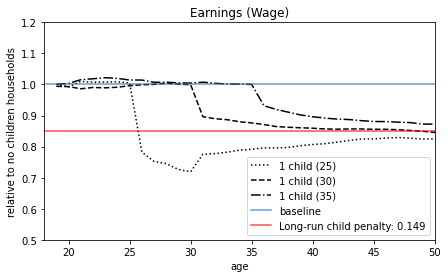

In [9]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Earnings (Wage)")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['W'].mean()

y25 = (df.loc[df['episode'].isin(kids25)].groupby('Q')['W'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30)].groupby('Q')['W'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35)].groupby('Q')['W'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

print(m_, m25)

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_earnings')


0.9340333247480833 0.9196137397009068


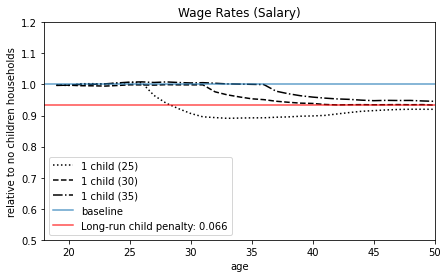

In [10]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Wage Rates (Salary)")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['S'].mean()

#standard.plot(label='0 børn')


y25 = (df.loc[df['episode'].isin(kids25)].groupby('Q')['S'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30)].groupby('Q')['S'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35)].groupby('Q')['S'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

print(m_, m25)


ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')


ax.legend()

f.savefig('..//figures//extended_model_event_wage_rates')


0.790597065068695 0.7631732986553039


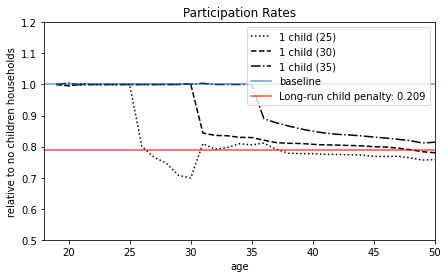

In [11]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Participation Rates")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['does_work'].mean()

y25 = (df.loc[df['episode'].isin(kids25) ].groupby('Q')['does_work'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) ].groupby('Q')['does_work'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) ].groupby('Q')['does_work'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_participation_rates')


# Hours worked + Salary Conditional on Labour Force Participation

In [ ]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Wage Rates (H>0)")

standard = df.loc[df['episode'].isin(kids0) & (df['action'] > 0)].groupby('Q')['S'].mean()

y25 = (df.loc[df['episode'].isin(kids25) & (df['action'] > 0)].groupby('Q')['S'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) & (df['action'] > 0)].groupby('Q')['S'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) & (df['action'] > 0)].groupby('Q')['S'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_wage_rates_H>0')


In [ ]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Earnings (H>0)")

standard = df.loc[df['episode'].isin(kids0) & (df['action'] > 0)].groupby('Q')['W'].mean()

y25 = (df.loc[df['episode'].isin(kids25) & (df['action'] > 0)].groupby('Q')['W'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) & (df['action'] > 0)].groupby('Q')['W'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) & (df['action'] > 0)].groupby('Q')['W'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_earnings_H>0')



### Hours worked alternative

In [ ]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Hours worked (H>0)")



standard = df.loc[df['episode'].isin(kids0) & (df['action'] > 0)].groupby('Q')['action'].mean()

y25 = (df.loc[df['episode'].isin(kids25) & (df['action'] > 0)].groupby('Q')['action'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) & (df['action'] > 0)].groupby('Q')['action'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) & (df['action'] > 0)].groupby('Q')['action'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_hours_worked_H>0')


In [ ]:
df_comparison = pd.DataFrame([
    {'value': 'Earnings', 'Kleven et al.': 0.194, 'result': 0.149, 'result ($H > 0$)': -0.077 },
    {'value': 'Hours worked', 'Kleven et al.': 0.097, 'result': 0.209, 'result ($H > 0$)': 0.000 },
    {'value': 'Participation rates', 'Kleven et al.': 0.130, 'result': 0.209 , 'result ($H > 0$)': None },
    {'value': 'Wage rates', 'Kleven et al.': 0.194, 'result': 0.066, 'result ($H > 0$)': - 0.077 },
])

df_comparison.rename({'value':' '}, inplace=True, axis=1)
to_latex_table('model_extended_results_comparison', df_comparison, directory = '..//tables',index=False, nr_decimals=3)


In [ ]:
df_comparison

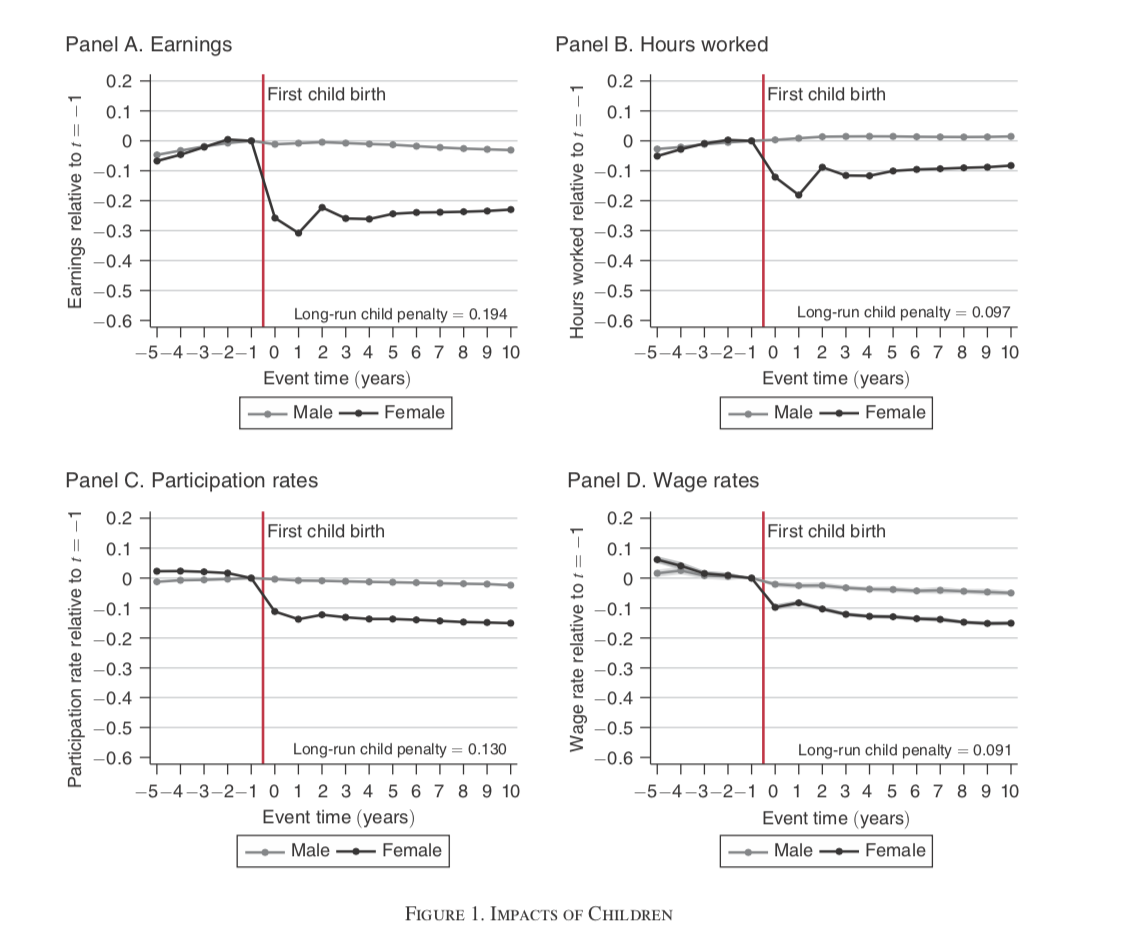